## 3. Hypothesis Testing

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("Data\winequality-red.csv")

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Saian\AppData\Local\Temp\ipykernel_244\1194014973.py:2: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv("Data\winequality-red.csv")


### 3.1. Testing whether mean pH is larger than 3.30

In [3]:
# Get pH column
pH = df['pH'].dropna()

# Print mean pH for verification
mean_pH = np.mean(pH)
print(f"Mean pH: {mean_pH}")

# Count how many entries
nEntries = pH.count()
print(f"Entries: {nEntries}")

Mean pH: 3.3111131957473416
Entries: 1599


In [4]:
# Perform a Single Tail Test

# Specify the hypothesized mean
mu = 3.3

# Specify the significance level
alpha = 0.05

# Specify the degrees of freedom
dof = nEntries - 1

# Get the sample mean and std
sample_mean = np.mean(pH)
sample_std = np.std(pH)

# Compute standard error (SE)
SE = sample_std / np.sqrt(nEntries)

# Get the test statistic
t_stat = (sample_mean - mu) / SE

# p-value for right-tailed test:
if t_stat > 0:
    p_value = 1 - stats.t.cdf(t_stat, dof)

else:
    p_value = 1.0

print("Single Tail Test against a hypothesized mean")
print("t_stat = ", t_stat)
print("p_value = ", p_value)

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀).")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀).")


Single Tail Test against a hypothesized mean
t_stat =  2.879319227251562
p_value =  0.002019206511054028

Conclusion: Reject the null hypothesis (H₀).


In [5]:
# Calculate a 95% Confidence Interval (CI) using t-dist

# Define the 2-sided t critical value
t_crit = stats.t.ppf(1 - alpha/2, dof)

# Define the margin of error
margin_of_error = t_crit * SE

# Compute upper and lower bounds
ci_upper = sample_mean + margin_of_error
ci_lower = sample_mean - margin_of_error

# Display results
print(f"Sample mean (Height): {sample_mean:.2f}")
print(f"95% CI using t-dist: [{ci_lower:.2f}, {ci_upper:.2f}]")


Sample mean (Height): 3.31
95% CI using t-dist: [3.30, 3.32]


### 3.2. Testing whether mean alcohol content differs between high- and low-quality wines

In [6]:
# Define the two groups: high quality and low quality
# High quality is quality >= 6
high_quality = df[df['quality'] >= 6]['alcohol'].dropna()

# Low quality is quality <= 5
low_quality = df[df['quality'] <= 5]['alcohol'].dropna()

In [7]:
# Count how many in each group
nHighQuality = high_quality.count()
print(f"Entries in High Quality Group: {nHighQuality}")

nLowQuality = low_quality.count()
print(f"Entries in Low Quality Group: {nLowQuality}")

Entries in High Quality Group: 855
Entries in Low Quality Group: 744


C:\Users\Saian\AppData\Local\Temp\ipykernel_244\1902948694.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([high_quality, low_quality], labels=["High Quality", "Low Quality"])


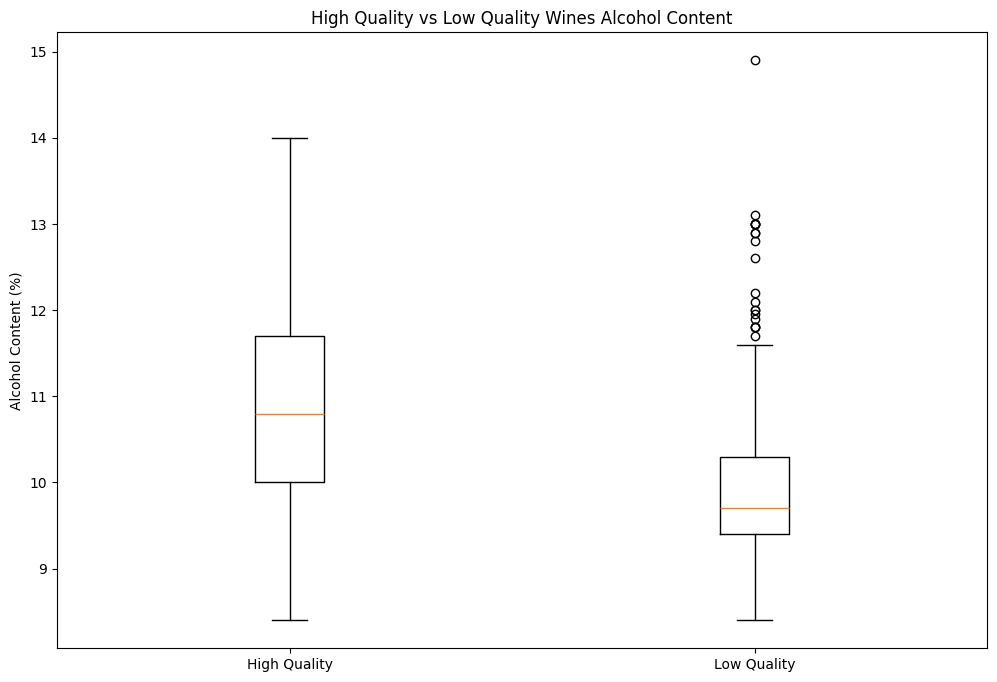

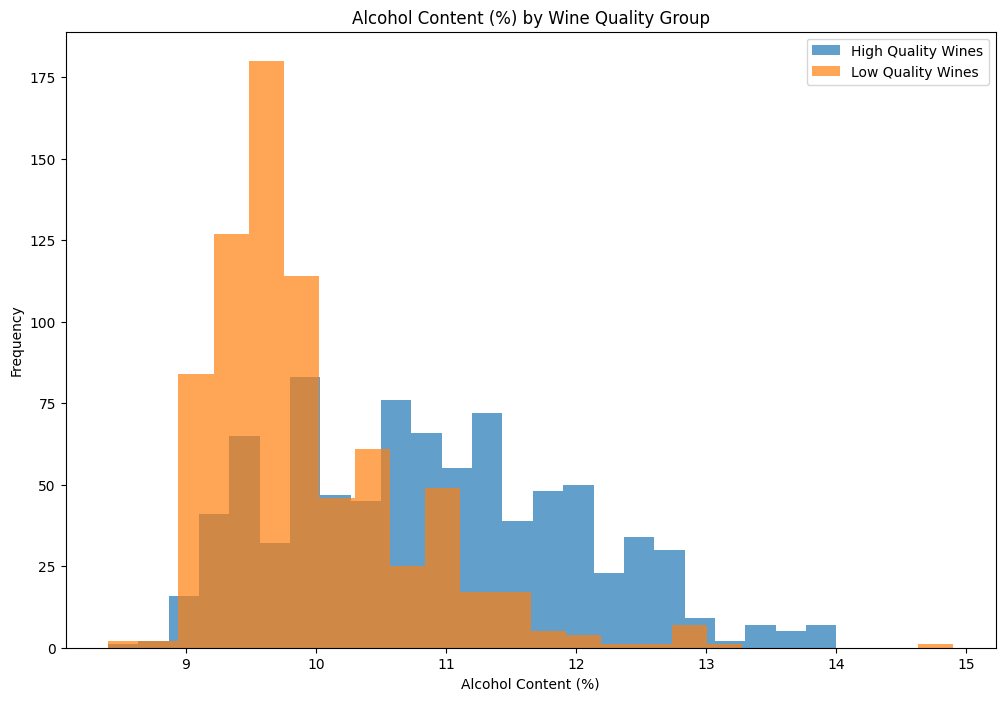

In [8]:
# Visually compare the groups

# Box Plot
labels = np.array(["High Quality"]*nHighQuality + ["Low Quality"]*nLowQuality)
combinedGroups = np.concatenate([high_quality, low_quality])

# Draw the box plot
plt.figure(figsize=(12,8))
plt.boxplot([high_quality, low_quality], labels=["High Quality", "Low Quality"])
plt.title("High Quality vs Low Quality Wines Alcohol Content")
plt.ylabel("Alcohol Content (%)")

# Histogram
plt.figure(figsize=(12,8))
plt.hist(high_quality, bins=24, alpha=0.7, label="High Quality Wines")
plt.hist(low_quality, bins=24, alpha=0.7, label="Low Quality Wines")
plt.title("Alcohol Content (%) by Wine Quality Group")
plt.xlabel("Alcohol Content (%)")
plt.ylabel("Frequency")
plt.legend()

In [ ]:
# Perform a Two-Sample t-test (independent)
t_stat, p_value = stats.ttest_ind(high_quality, low_quality, equal_var=True)

# Display the results
print("Two-Sample t-test (Alcohol Content between high and low quality wines)")
print("t_stat = ", t_stat)
print("p_value = ", p_value)

# Check against the significance level
alpha = 0.05

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀). There is a significant difference in alcohol content between high and low quality wines.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀). There is no significant difference in alcohol content between high and low quality wines.")

Two-Sample t-test (Alcohol Content between high and low quality wines)
t_stat =  19.292349918493183
p_value =  1.0239802418655636e-74

Conclusion: Reject the null hypothesis (H₀). There is a significant difference in alcohol content between high and low quality wines.


In [10]:
# Power Analysis - Analytical Approach

from statsmodels.stats.power import TTestIndPower

# Instantiate TTestIndPower class
analysis = TTestIndPower()

# Anticipated difference
difference = 1.0

# Assumed standard deviation
std = 1.0

# Cohen's d: Effect Size = (difference / std)
effect_size = difference / std

# Set significance level and power
alpha = 0.05
power = 0.90

# Solve for sample size per group
sample_size = analysis.solve_power(effect_size=effect_size,
                                   alpha=alpha,
                                   power=power,
                                   alternative='two-sided')

# Display the result
print("Required sample size per group = ", sample_size)

#  Suppose we fix n per group, find the power
nFix = 20
my_power = analysis.solve_power(effect_size=effect_size,
                          alpha=alpha,
                          nobs1=nFix,
                          alternative='two-sided')

# Display the result
print(f"Power with n = {nFix} per group = {my_power:3f}")

Required sample size per group =  22.021089673603985
Power with n = 20 per group = 0.868953
